In [5]:
import seaborn as sns
import pandas as pd
import json
import re
import folium


# 차트 내 한글 및 마이너스 기호 표시를 위한 import
from matplotlib import rc
import matplotlib.font_manager as fm

import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False},style='darkgrid')


from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [6]:
df = pd.read_csv('../01데이터정리/2차전처리본_도로율수정.csv')
df.head()

,행정동,구_x,행정동코드,1인가구,생활인구,동면적,도로율,도로면적,사망자수,중상자수,경상자수,교차로,단일
0,강남신사,강남구,11680510,1094,75610,2.53,0.2406,0.617358,1,51,7,22,23
1,개포동,강남구,11680660,3888,49830,5.27,0.2406,1.267962,0,39,12,24,15
2,논현동,강남구,11680521,11739,88619,2.72,0.2406,0.654432,0,139,27,49,67
3,대치동,강남구,11680600,6426,119943,3.52,0.2406,0.846912,3,94,7,41,52
4,도곡동,강남구,11680655,3280,65611,2.04,0.2406,0.490824,1,40,9,22,19


In [7]:
df= df.drop(columns=['행정동코드','구_x'])
df.head()

,행정동,1인가구,생활인구,동면적,도로율,도로면적,사망자수,중상자수,경상자수,교차로,단일
0,강남신사,1094,75610,2.53,0.2406,0.617358,1,51,7,22,23
1,개포동,3888,49830,5.27,0.2406,1.267962,0,39,12,24,15
2,논현동,11739,88619,2.72,0.2406,0.654432,0,139,27,49,67
3,대치동,6426,119943,3.52,0.2406,0.846912,3,94,7,41,52
4,도곡동,3280,65611,2.04,0.2406,0.490824,1,40,9,22,19


In [8]:
# 정규화 이후 인덱스 이름 부여를 위한 리스트 저장
indexname = df['행정동']
indexname

0      강남신사
1       개포동
2       논현동
3       대치동
4       도곡동
       ... 
199     면목동
200      묵동
201     상봉동
202     신내동
203     중화동
Name: 행정동, Length: 204, dtype: object

In [9]:
df = df.set_index('행정동')
df

,1인가구,생활인구,동면적,도로율,도로면적,사망자수,중상자수,경상자수,교차로,단일
행정동,,,,,,,,,,
강남신사,1094,75610,2.53,0.2406,0.617358,1,51,7,22,23
개포동,3888,49830,5.27,0.2406,1.267962,0,39,12,24,15
논현동,11739,88619,2.72,0.2406,0.654432,0,139,27,49,67
대치동,6426,119943,3.52,0.2406,0.846912,3,94,7,41,52
도곡동,3280,65611,2.04,0.2406,0.490824,1,40,9,22,19
...,...,...,...,...,...,...,...,...,...,...
면목동,22193,113863,6.01,0.2601,1.563201,3,154,26,71,75
묵동,6790,44265,1.87,0.2601,0.486387,0,50,8,27,18
상봉동,7686,43730,1.53,0.2601,0.397953,0,71,12,41,26


In [10]:
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(df)

minmax_df = pd.DataFrame(minmax_scaled)

In [11]:
minmax_df

,0,1,2,3,4,5,6,7,8,9
0,0.011154,0.232939,0.121425,0.253066,0.118340,0.166667,0.211864,0.145833,0.171875,0.264368
1,0.054801,0.147751,0.269293,0.253066,0.257003,0.000000,0.161017,0.250000,0.187500,0.172414
2,0.177448,0.275927,0.131678,0.253066,0.126242,0.000000,0.584746,0.562500,0.382812,0.770115
3,0.094450,0.379435,0.174852,0.253066,0.167265,0.500000,0.394068,0.145833,0.320312,0.597701
4,0.045303,0.199898,0.094981,0.253066,0.091372,0.166667,0.165254,0.187500,0.171875,0.218391
...,...,...,...,...,...,...,...,...,...,...
199,0.340759,0.359344,0.309228,0.325530,0.319926,0.500000,0.648305,0.541667,0.554688,0.862069
200,0.100136,0.129362,0.085807,0.325530,0.090426,0.000000,0.207627,0.166667,0.210938,0.206897
201,0.114133,0.127594,0.067458,0.325530,0.071579,0.000000,0.296610,0.250000,0.320312,0.298851
202,0.031962,0.096873,0.123044,0.325530,0.128676,0.000000,0.173729,0.229167,0.148438,0.206897


In [12]:
minmax_df.columns = ['1인가구','생활인구','동면적','도로율','도로면적','사망자수','중상자수','경상자수','교차로','단일']
minmax_df

,1인가구,생활인구,동면적,도로율,도로면적,사망자수,중상자수,경상자수,교차로,단일
0,0.011154,0.232939,0.121425,0.253066,0.118340,0.166667,0.211864,0.145833,0.171875,0.264368
1,0.054801,0.147751,0.269293,0.253066,0.257003,0.000000,0.161017,0.250000,0.187500,0.172414
2,0.177448,0.275927,0.131678,0.253066,0.126242,0.000000,0.584746,0.562500,0.382812,0.770115
3,0.094450,0.379435,0.174852,0.253066,0.167265,0.500000,0.394068,0.145833,0.320312,0.597701
4,0.045303,0.199898,0.094981,0.253066,0.091372,0.166667,0.165254,0.187500,0.171875,0.218391
...,...,...,...,...,...,...,...,...,...,...
199,0.340759,0.359344,0.309228,0.325530,0.319926,0.500000,0.648305,0.541667,0.554688,0.862069
200,0.100136,0.129362,0.085807,0.325530,0.090426,0.000000,0.207627,0.166667,0.210938,0.206897
201,0.114133,0.127594,0.067458,0.325530,0.071579,0.000000,0.296610,0.250000,0.320312,0.298851
202,0.031962,0.096873,0.123044,0.325530,0.128676,0.000000,0.173729,0.229167,0.148438,0.206897


In [13]:
minmax_df.set_index(indexname)


,1인가구,생활인구,동면적,도로율,도로면적,사망자수,중상자수,경상자수,교차로,단일
행정동,,,,,,,,,,
강남신사,0.011154,0.232939,0.121425,0.253066,0.118340,0.166667,0.211864,0.145833,0.171875,0.264368
개포동,0.054801,0.147751,0.269293,0.253066,0.257003,0.000000,0.161017,0.250000,0.187500,0.172414
논현동,0.177448,0.275927,0.131678,0.253066,0.126242,0.000000,0.584746,0.562500,0.382812,0.770115
대치동,0.094450,0.379435,0.174852,0.253066,0.167265,0.500000,0.394068,0.145833,0.320312,0.597701
도곡동,0.045303,0.199898,0.094981,0.253066,0.091372,0.166667,0.165254,0.187500,0.171875,0.218391
...,...,...,...,...,...,...,...,...,...,...
면목동,0.340759,0.359344,0.309228,0.325530,0.319926,0.500000,0.648305,0.541667,0.554688,0.862069
묵동,0.100136,0.129362,0.085807,0.325530,0.090426,0.000000,0.207627,0.166667,0.210938,0.206897
상봉동,0.114133,0.127594,0.067458,0.325530,0.071579,0.000000,0.296610,0.250000,0.320312,0.298851


In [14]:
minmax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1인가구    204 non-null    float64
 1   생활인구    204 non-null    float64
 2   동면적     204 non-null    float64
 3   도로율     204 non-null    float64
 4   도로면적    204 non-null    float64
 5   사망자수    204 non-null    float64
 6   중상자수    204 non-null    float64
 7   경상자수    204 non-null    float64
 8   교차로     204 non-null    float64
 9   단일      204 non-null    float64
dtypes: float64(10)
memory usage: 16.1 KB


In [15]:
minmax_df_corr = minmax_df.corr(method='pearson')
minmax_df_corr

,1인가구,생활인구,동면적,도로율,도로면적,사망자수,중상자수,경상자수,교차로,단일
1인가구,1.000000,0.803925,0.588543,0.115361,0.597760,0.317644,0.698595,0.664533,0.687573,0.655122
생활인구,0.803925,1.000000,0.687655,0.157609,0.695240,0.339846,0.645256,0.595248,0.626126,0.638771
동면적,0.588543,0.687655,1.000000,0.117354,0.990871,0.264420,0.367514,0.397995,0.386498,0.322690
도로율,0.115361,0.157609,0.117354,1.000000,0.197205,-0.037160,0.072605,0.061558,0.056727,0.083114
도로면적,0.597760,0.695240,0.990871,0.197205,1.000000,0.257466,0.372996,0.402496,0.388571,0.331967
사망자수,0.317644,0.339846,0.264420,-0.037160,0.257466,1.000000,0.443647,0.400963,0.472671,0.446726
중상자수,0.698595,0.645256,0.367514,0.072605,0.372996,0.443647,1.000000,0.891246,0.974847,0.958499
경상자수,0.664533,0.595248,0.397995,0.061558,0.402496,0.400963,0.891246,1.000000,0.880514,0.828471
교차로,0.687573,0.626126,0.386498,0.056727,0.388571,0.472671,0.974847,0.880514,1.000000,0.880127
단일,0.655122,0.638771,0.322690,0.083114,0.331967,0.446726,0.958499,0.828471,0.880127,1.000000


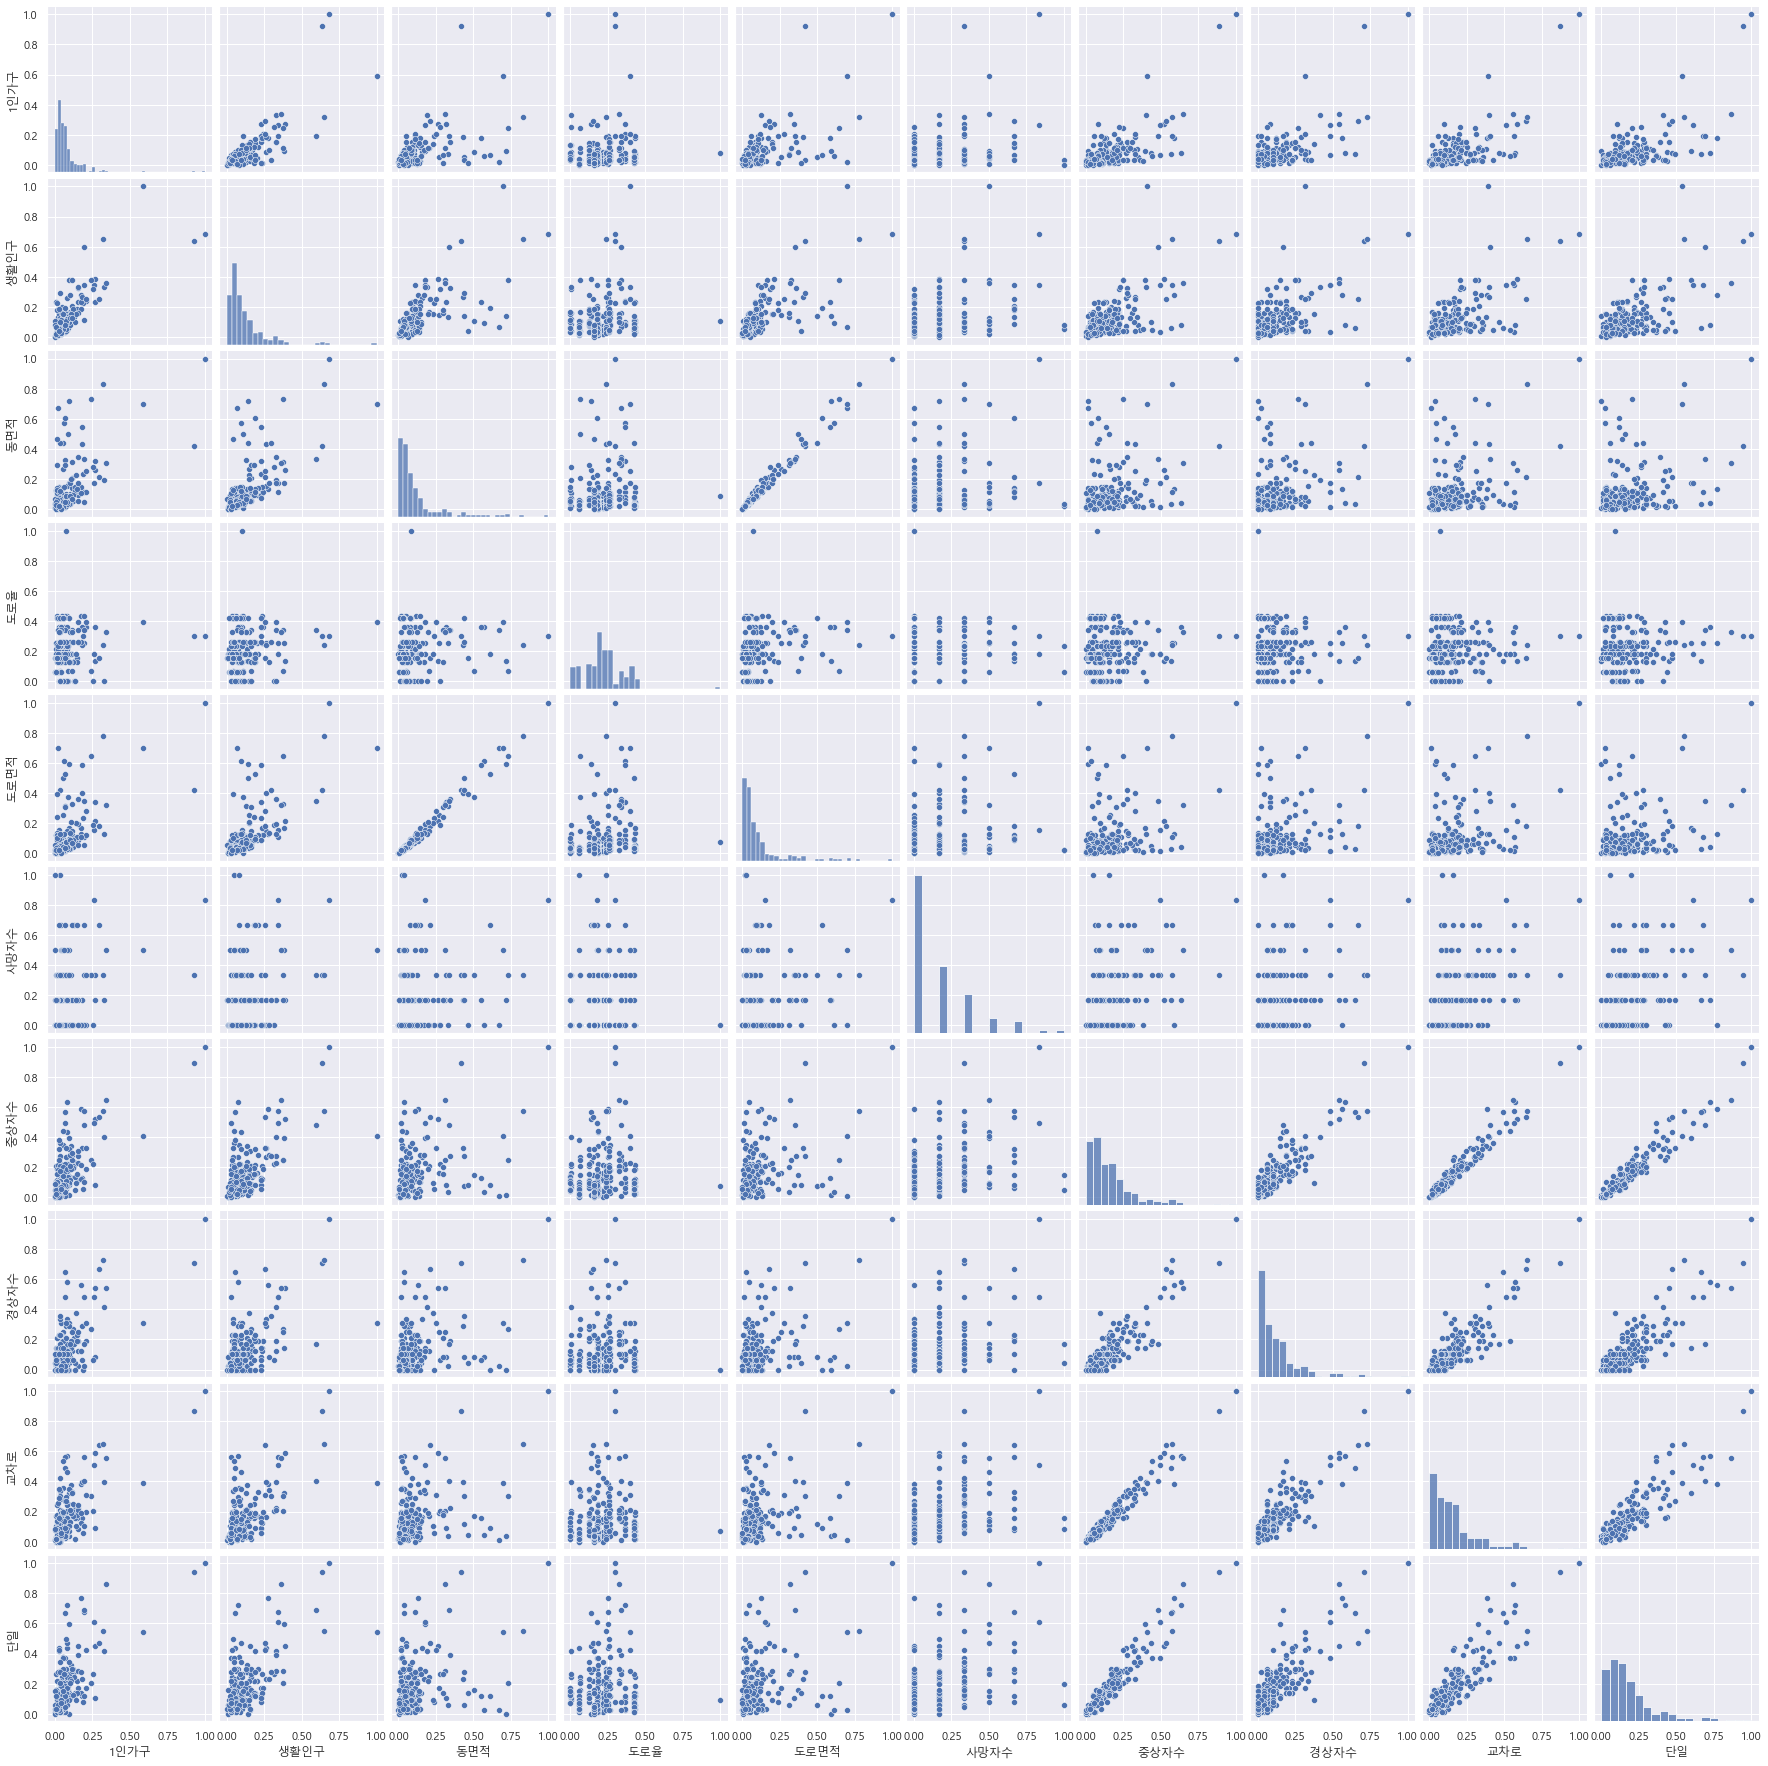

In [16]:
sns.pairplot(minmax_df)
plt.show()

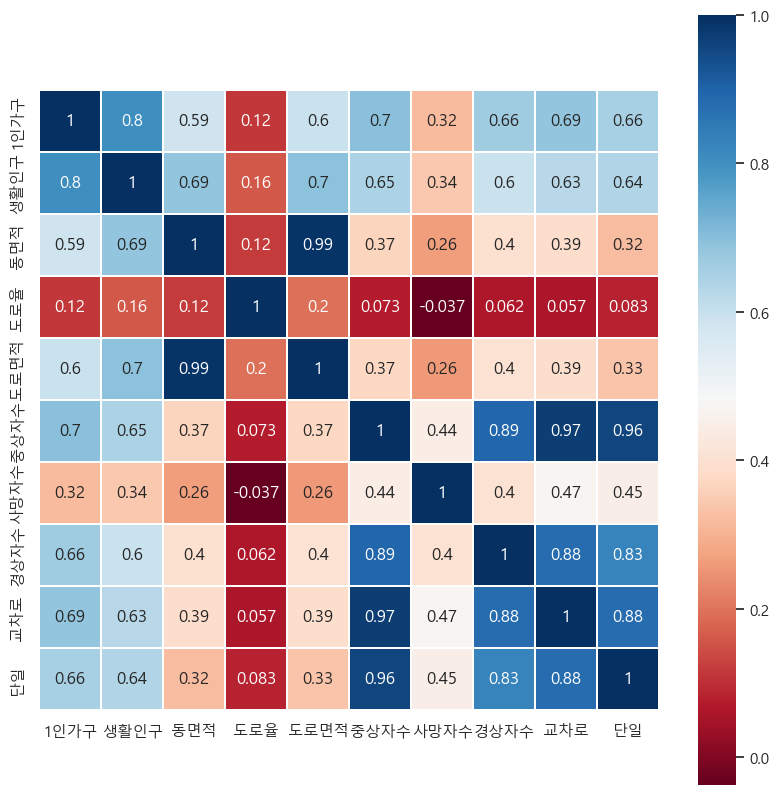

In [17]:
heatmap_data = minmax_df[['1인가구','생활인구','동면적','도로율', '도로면적','중상자수', '사망자수', '경상자수','교차로','단일']]
plt.figure(figsize=(10,10))
color_map= plt.cm.RdBu
sns.heatmap(data=heatmap_data.astype(float).corr(),linewidths=0.1, square=True, cmap = color_map, linecolor= 'white',annot=True, )
plt.show()

In [18]:
minmax_df_corr.to_csv('../01데이터정리/변수간_상관계수.csv', encoding='utf-8', index=False)

#### 유의미한 독립변수로 1인가구, 생활인구, 교차로 선정



### K-Mean 클러스터링

#### 클러스터링을 위한 군집 수 도출 - elbow method

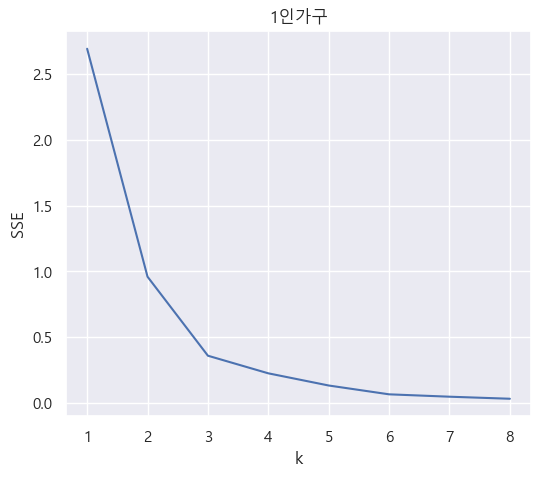

In [19]:
# 1인가구
df_oneman = pd.DataFrame(minmax_df['1인가구'])

inertia= []
for k in range(1,9):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_oneman)
    inertia.append(km.inertia_)
plt.figure(figsize=(6,5))
plt.plot(range(1,9), inertia)
plt.title('1인가구')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

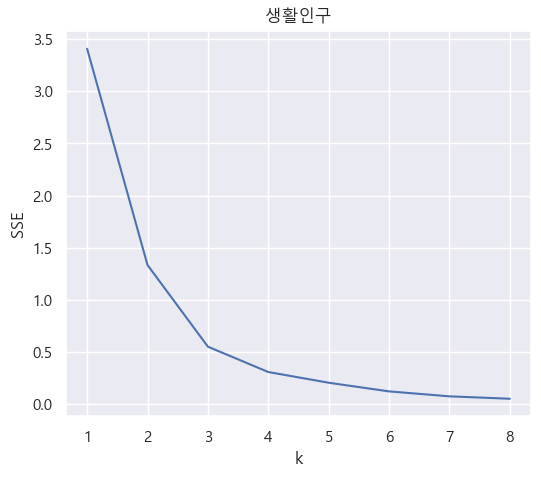

In [20]:
df_livingpop = pd.DataFrame(minmax_df['생활인구'])

inertia= []
for k in range(1,9):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_livingpop)
    inertia.append(km.inertia_)
plt.figure(figsize=(6,5))
plt.plot(range(1,9), inertia)
plt.title('생활인구')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

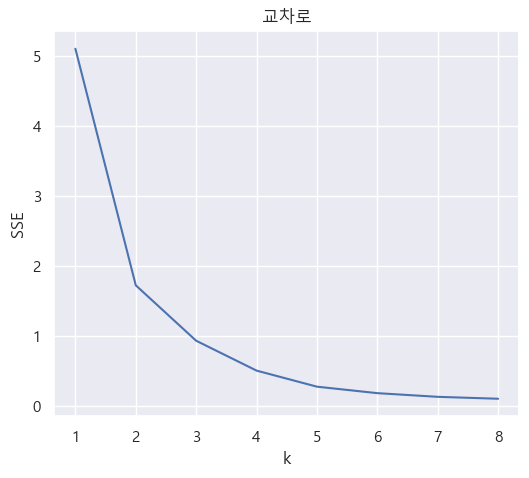

In [21]:
df_cross = pd.DataFrame(minmax_df['교차로'])

inertia= []
for k in range(1,9):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_cross)
    inertia.append(km.inertia_)
plt.figure(figsize=(6,5))
plt.plot(range(1,9), inertia)
plt.title('교차로')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

### 군집화된 데이터를 산점도로 표현

In [22]:
# 유효한 변수들만으로 산점도 표현 및 군집화
minmax_df_choice = minmax_df.drop(columns=['동면적','도로율','도로면적','사망자수','경상자수','단일'])
minmax_df_choice.set_index(indexname, inplace=True)
minmax_df_choice.head()

,1인가구,생활인구,중상자수,교차로
행정동,,,,
강남신사,0.011154,0.232939,0.211864,0.171875
개포동,0.054801,0.147751,0.161017,0.187500
논현동,0.177448,0.275927,0.584746,0.382812
대치동,0.094450,0.379435,0.394068,0.320312
도곡동,0.045303,0.199898,0.165254,0.171875


In [23]:
# 적절한 군집수 3을 가지고 군집 예측값 생성

cluster_model = KMeans(n_clusters=3,        # =k
                       n_init=3,           # centroid를 몇번 샘플링한건지, 많이 돌릴수록 안정화된 결과가 나옴
                       max_iter=500,        # K-Means를 몇번 반복 수행할건지
                       random_state=42,)

cluster_model.fit(minmax_df_choice)

centers = cluster_model.cluster_centers_    # 각 군집의 중심점
pred = cluster_model.predict(minmax_df_choice)     # 각 예측군집

print(pd.DataFrame(centers))
print(pred[:10])

          0         1         2         3
0  0.052319  0.078380  0.085923  0.084093
1  0.104811  0.168287  0.291525  0.292500
2  0.438741  0.525481  0.612712  0.616406
[1 0 1 1 0 1 0 0 0 2]


In [24]:
# 클러스터링 결과에 따른 각 데이터별 군집 번호를 데이터프레임에 추가
cluster_df = minmax_df_choice.copy()
cluster_df['clust'] = pred
cluster_df

,1인가구,생활인구,중상자수,교차로,clust
행정동,,,,,
강남신사,0.011154,0.232939,0.211864,0.171875,1
개포동,0.054801,0.147751,0.161017,0.187500,0
논현동,0.177448,0.275927,0.584746,0.382812,1
대치동,0.094450,0.379435,0.394068,0.320312,1
도곡동,0.045303,0.199898,0.165254,0.171875,0
...,...,...,...,...,...
면목동,0.340759,0.359344,0.648305,0.554688,2
묵동,0.100136,0.129362,0.207627,0.210938,1
상봉동,0.114133,0.127594,0.296610,0.320312,1


In [25]:
cluster_df.set_index(indexname)

,1인가구,생활인구,중상자수,교차로,clust
행정동,,,,,
강남신사,0.011154,0.232939,0.211864,0.171875,1
개포동,0.054801,0.147751,0.161017,0.187500,0
논현동,0.177448,0.275927,0.584746,0.382812,1
대치동,0.094450,0.379435,0.394068,0.320312,1
도곡동,0.045303,0.199898,0.165254,0.171875,0
...,...,...,...,...,...
면목동,0.340759,0.359344,0.648305,0.554688,2
묵동,0.100136,0.129362,0.207627,0.210938,1
상봉동,0.114133,0.127594,0.296610,0.320312,1


#### 각 군집을 산점도로 확인

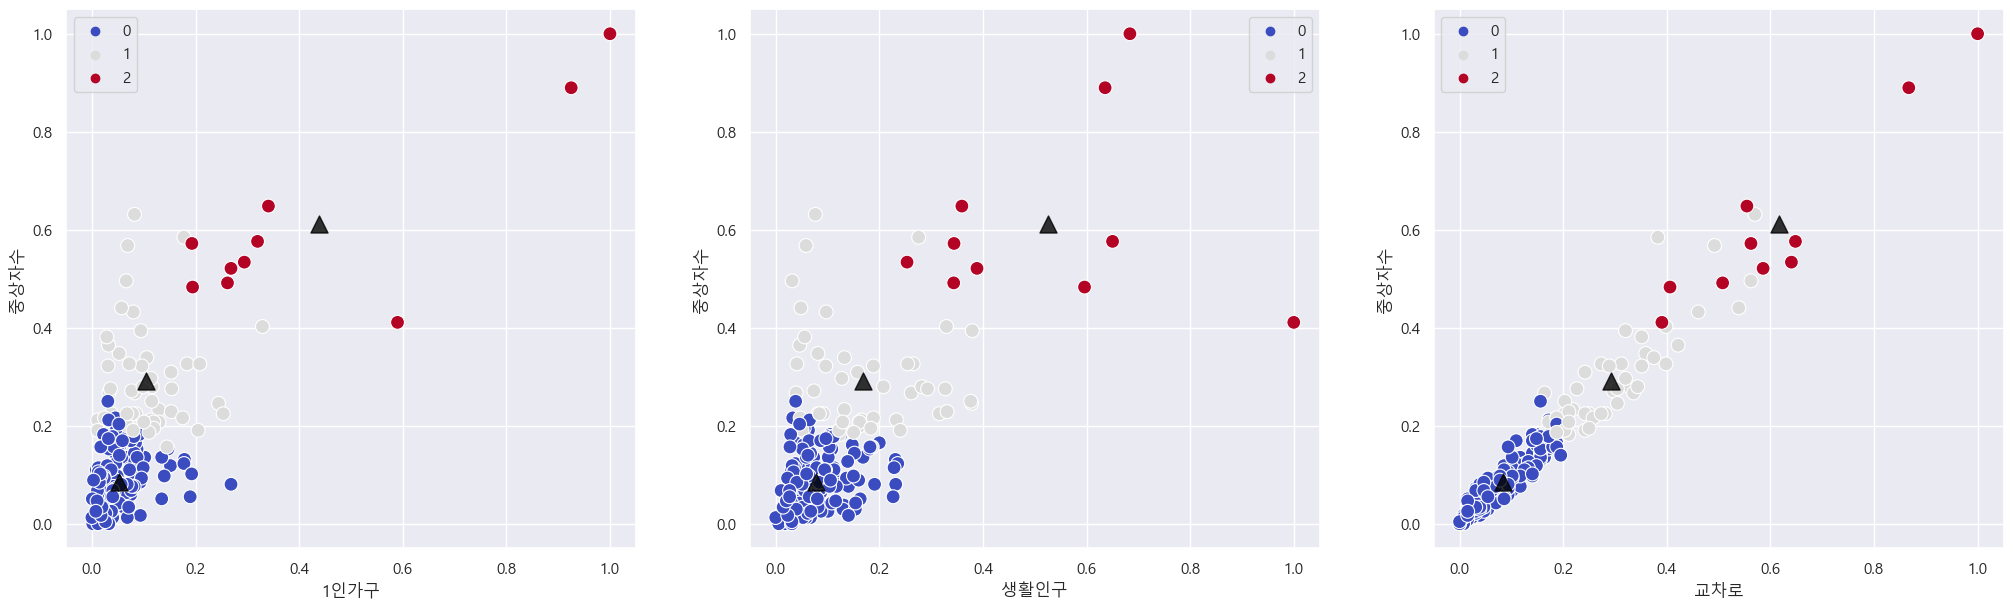

In [26]:

plt.figure(figsize=(25,7))
X= cluster_df
plt.subplot(131)    # 1인가구
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,2], data=minmax_df_choice, hue=cluster_model.labels_, palette='coolwarm', s= 100) #
plt.scatter(centers[:,0], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')

plt.subplot(132)    # 생활인구
sns.scatterplot(x=X.iloc[:,1], y=X.iloc[:,2], data=minmax_df_choice, hue=cluster_model.labels_, palette='coolwarm', s= 100) #
plt.scatter(centers[:,1], centers[:,2], c='black', alpha=0.8, s=150, marker='^')

plt.subplot(133)    # 교차로
sns.scatterplot(x=X.iloc[:,3], y=X.iloc[:,2], data=minmax_df_choice, hue=cluster_model.labels_, palette='coolwarm', s= 100) #
plt.scatter(centers[:,3], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')

plt.show()

In [27]:
# 2번 군집의 동을 확인
condition2 = (cluster_df.clust == 2)

df.loc[condition2]

,1인가구,생활인구,동면적,도로율,도로면적,사망자수,중상자수,경상자수,교차로,단일
행정동,,,,,,,,,,
역삼동,12735,109277,2.35,0.2406,0.565410,4,136,23,72,59
수유동,17567,122683,5.11,0.2093,1.069523,1,124,26,75,39
봉천동,59604,197525,8.03,0.2531,2.040423,2,211,34,111,82
신림동,64393,212017,18.81,0.2531,4.754106,5,237,48,128,87
구로동,17133,109083,3.53,0.2206,0.778718,5,117,23,65,53
독산동,19213,81826,4.20,0.2138,0.897960,4,127,32,82,41
상계동,20848,201877,15.68,0.2371,3.717728,2,137,35,83,48
서초동,12821,185510,6.47,0.2635,1.704845,2,115,8,52,60
신정동,38144,307741,13.21,0.2788,3.342388,3,98,15,50,47


### 지도 시각화

In [28]:
df = pd.read_csv('../01데이터정리/이륜차_사고다발지정보.csv')


In [41]:
# 이륜차 사고다발지 정보 데이터 중 서울의 데이터만 뽑아서 df_seoul에 저장
df['시'] = df['시도시군구명'].str.split().str.get(0)
df_seoul = df[df['시']=='서울특별시']
df_seoul.head()

,사고다발지FID,사고다발지ID,법정동코드,지점코드,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤,시
0,104688,2020058,1111017500,11110001,서울특별시 종로구1,서울특별시 종로구 숭인동(동묘앞역 부근),43,53,0,19,27,7,127.015644,37.573022,"{""type"":""Polygon"",""coordinates"":[[[127.0167759...",서울특별시
1,104683,2020058,1111017400,11110002,서울특별시 종로구2,서울특별시 종로구 창신동(오간수교남단 부근),28,33,0,6,16,11,127.009633,37.569467,"{""type"":""Polygon"",""coordinates"":[[[127.0107653...",서울특별시
2,104684,2020058,1111016400,11110003,서울특별시 종로구3,서울특별시 종로구 종로6가(동대문로터리 부근),25,28,0,6,13,9,127.008737,37.571310,"{""type"":""Polygon"",""coordinates"":[[[127.0098693...",서울특별시
3,104573,2020058,1111016500,11110004,서울특별시 종로구4,서울특별시 종로구 이화동(이화사거리 부근),24,24,0,9,12,3,127.002189,37.576176,"{""type"":""Polygon"",""coordinates"":[[[127.0033209...",서울특별시
4,104773,2020058,1111016100,11110005,서울특별시 종로구5,서울특별시 종로구 종로4가(종로4가일반국도6호선 부근),21,31,0,12,16,3,126.997298,37.570828,"{""type"":""Polygon"",""coordinates"":[[[126.9984304...",서울특별시


In [36]:
# 2번 군집에 대한 geojson
path='../01데이터정리/cluster2.geojson'
rfile2 = open(path,'r',encoding='utf8').read()
jsonfile2 = json.loads(rfile2)

# 1번 군집에 대한 geojson
path='../01데이터정리/cluster1.geojson'
rfile1 = open(path,'r',encoding='utf8').read()
jsonfile1 = json.loads(rfile1)


#### 사고다발지 위치

In [37]:

map = folium.Map((37.558480,126.977420), zoom_start=11)

for i in df_seoul.index:
    lat = df_seoul.loc[i, '위도']
    long = df_seoul.loc[i, '경도']
    folium.CircleMarker([lat,long],
                    tooltip= df_seoul.loc[i,'지점명'],
                    color='red',
                    fill=True,
                    radius=4
                    ).add_to(map)
map

#### 사고다발지 위치와 2번 군집

In [38]:

map = folium.Map((37.558480,126.977420), zoom_start=11)

choropleth2 = folium.Choropleth(jsonfile2,
                               fill_color='orange',
                               fill_opacity=0.6,
                               line_color='purple').add_to(map)

choropleth2.geojson.add_child(
    folium.features.GeoJsonTooltip(['adm_nm'], labels=False)
)

for i in df_seoul.index:
    lat = df_seoul.loc[i, '위도']
    long = df_seoul.loc[i, '경도']
    folium.CircleMarker([lat,long],
                    tooltip= df_seoul.loc[i,'지점명'],
                    color='red',
                    fill=True,
                    radius=4
                    ).add_to(map)
map

#### 사고다발지 위치와 1,2번 군집

In [39]:

map = folium.Map((37.558480,126.977420), zoom_start=11)

choropleth2 = folium.Choropleth(jsonfile2,
                               fill_color='orange',
                               fill_opacity=0.6,
                               line_color='purple').add_to(map)

choropleth2.geojson.add_child(
    folium.features.GeoJsonTooltip(['adm_nm'], labels=False)
)

choropleth1 = folium.Choropleth(jsonfile1,
                               fill_color='yellow',
                               fill_opacity=0.6,
                               line_color='green').add_to(map)

choropleth1.geojson.add_child(
    folium.features.GeoJsonTooltip(['adm_nm'], labels=False)
)

for i in df_seoul.index:
    lat = df_seoul.loc[i, '위도']
    long = df_seoul.loc[i, '경도']
    folium.CircleMarker([lat,long],
                    tooltip= df_seoul.loc[i,'지점명'],
                    color='red',
                    fill=True,
                    radius=4
                    ).add_to(map)
map

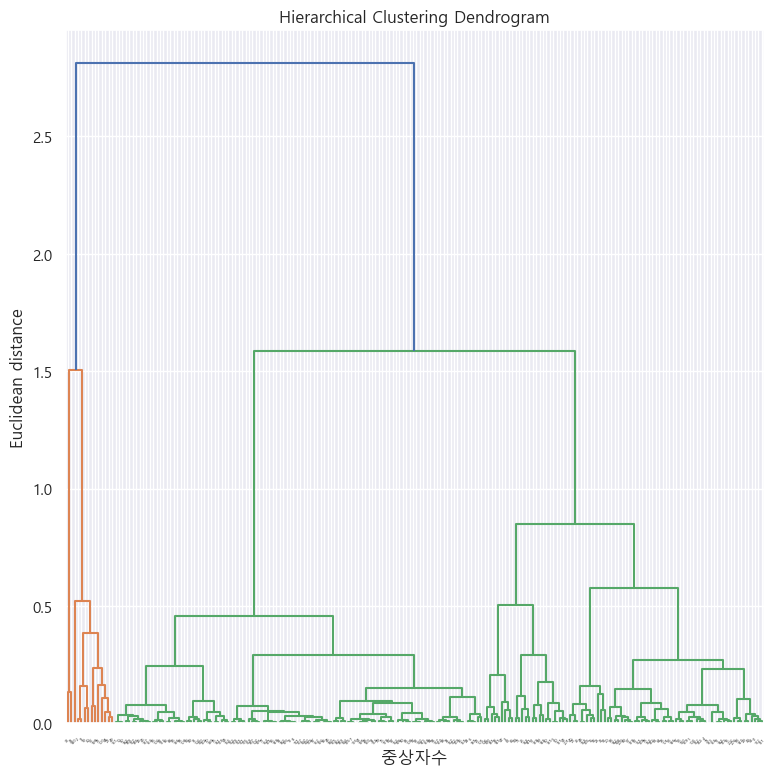

In [40]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import seaborn as sns
import scipy

#font 불러오기 : D2Coding
from matplotlib import font_manager, rc
# plt.rc('font', family='D2Coding')

df1 = minmax_df[['1인가구','중상자수']]
df1 

#draw dendrogram
Z = linkage(df1, method='ward', metric='euclidean')

# K means 가 중요한 까닭은 프로토타입 이론을 충실하게 따르기 때문. 프로토 타입 이론은 인지과학이론으로서, 
# 사람들은 사물을 인지할 때 해당 범주의 프로토타입 혹은 이상적인 사물을 떠올리고 이를 기반으로 항목과 개념을 분류한다는 이론.

# 가령 의자는 의자다리, 좌석, 등받이, 팔걸이, 리클라이너, 무릎받침, 장식물 등으로 구성됨 그런데 어떤 의자들은 의자다리가 없거나,
# 좌석이 없거나, 등받이가 없거나, 팔걸이가 없거나, 리클라이너가 없거나, 무릎받침이 없거나, 장식물이 없거나 몇몇 요소가 빠져 있을 수 있음
# 심지어 좌석이 없더라도 사람들은 그 사물을 의자로 인지할 수 있음 뭐가 더 달려있고 말고가 아닌 사물의 기본적인 구조가 의자라는 것을
# 인지하는 것임. 이게 Proto Type. 이러한 인지과학적 이론을 기반으로 K means가 클러스터링을 수행함.


# K method와 같은 Prototype based stratified. 여기서는 각 군집간 euclidean distance를 구해서 표시
# Ward method는 군집간 거리를 구할 때 ESS 변동량으로 두 군집 사이 거리를 구함 (Error SS)
# ESS는 각 군집의 분산을 의미함, 그러므로 군집간의 거리는 Corr 임.
# K 최근접이 영어로 쓰면 K neighbor인데 걔 이웃쯤 되는 개념이라고 생각하면 편함. 이것도 거리로 표시

# 다만 K Method가 분할적(Partitional) 군집화이고, Ward Method는 계층적(Hierarchial) 군집화임
# K Method가 분할적 군집화는 객체가 하나의 군집에 속하게 군집을 분할 시키는 방식이고 (K neighbor도 당연히.)
# Ward Method는 각각의 객체가 유사성 척도 (Euclidean distance)를 기준으로 군집을 형성하는 방식이므로 
# 특정 hierarchical cluster 에 속해있더라도 계층의 Tree에서 어느 수준을 기준으로 하냐에 따라 군집이 달라지게 됨
# 그래서 K-method는 cluster를 고정값으로 부여하지만 Ward Method는 cluster를 지정하지 않고 계속 변동해가며 볼 수 있음
# euclidean distance 두 점을 잇는 최단거리를 뜻함.



plt.figure(figsize=(9, 9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('중상자수')
plt.ylabel('Euclidean distance')

dendrogram(Z, leaf_rotation=48, leaf_font_size=3, orientation='top',labels=df1.index)

plt.show()